<a href="https://colab.research.google.com/github/tokedo/rethinking/blob/main/Rethinking_Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math

from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'


In [ ]:
# Define the grid of values for the Bernoulli probability
p_grid = np.linspace(0, 1, 20)
p_grid

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [ ]:
# Define the prior distribution as a uniform distribution
prior = np.ones_like(p_grid)
prior = prior / np.sum(prior)
prior

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

In [ ]:
def binomial_likelihood(w, n, p):
  """Computes the likelihood of the outcome for binomial experiment.
  """
  return (
      math.factorial(n)
      / math.factorial(w)
      / math.factorial(n-w)
      * (p)**w * (1 - p)**(n-w)
      )

In [ ]:
# Compute the likelihood at each grid value using the binomial distribution

W = 6
N = 9

likelihood = [binomial_likelihood(W, N, p) for p in p_grid]

likelihood

[0.0,
 1.518148982349835e-06,
 8.185092949558012e-05,
 0.0007772922789631152,
 0.003598575365569979,
 0.011160946093664125,
 0.026682986513780694,
 0.0529210991479928,
 0.09082697598243351,
 0.13834132601662874,
 0.18976862279372936,
 0.23611465826683403,
 0.2666112516843486,
 0.27140056190174167,
 0.24500508864811496,
 0.18976862279372936,
 0.11791811757899716,
 0.05026670207647326,
 0.008853844865064261,
 0.0]

In [ ]:
# Compute the product of the likelihood and prior
unnorm_posterior = likelihood * prior


# Normalize the posterior distribution so it sums to 1
posterior = unnorm_posterior / np.sum(unnorm_posterior)

# Print the posterior distribution
posterior


array([0.00000000e+00, 7.98983711e-07, 4.30771684e-05, 4.09079660e-04,
       1.89388732e-03, 5.87387288e-03, 1.40429377e-02, 2.78517436e-02,
       4.78011547e-02, 7.28073907e-02, 9.98729639e-02, 1.24264330e-01,
       1.40314323e-01, 1.42834880e-01, 1.28943257e-01, 9.98729639e-02,
       6.20588995e-02, 2.64547661e-02, 4.65967300e-03, 0.00000000e+00])

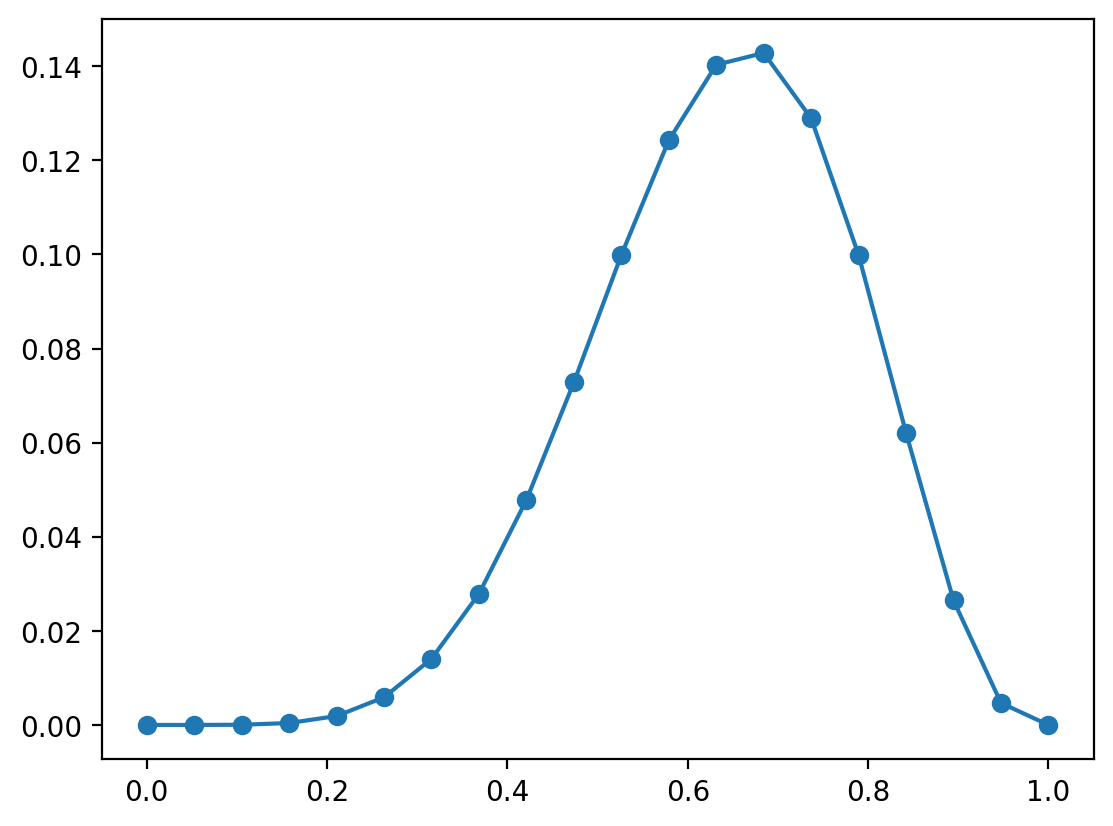

In [ ]:
plt.plot(p_grid, posterior, '-o')

### Bayesian learning: Grid Search

In [ ]:
def bayesian_bernoulli_learning(p_grid, prior, n_trials, n_wins):

  # compute data likelihood for each parameter value:
  likelihood = [binomial_likelihood(n_wins, n_trials, p) for p in p_grid]

  # compute the product of the likelihood and prior
  unnorm_posterior = likelihood * prior

  # normalize the posterior distribution so it sums to 1
  posterior = unnorm_posterior / np.sum(unnorm_posterior)

  return posterior

In [ ]:
p_grid = np.linspace(0, 1, 20)

# Define the prior distribution as a uniform distribution
prior = np.ones_like(p_grid)
prior = prior / np.sum(prior)

In [ ]:
post = bayesian_bernoulli_learning(
    p_grid,
    prior,
    1,
    1
)

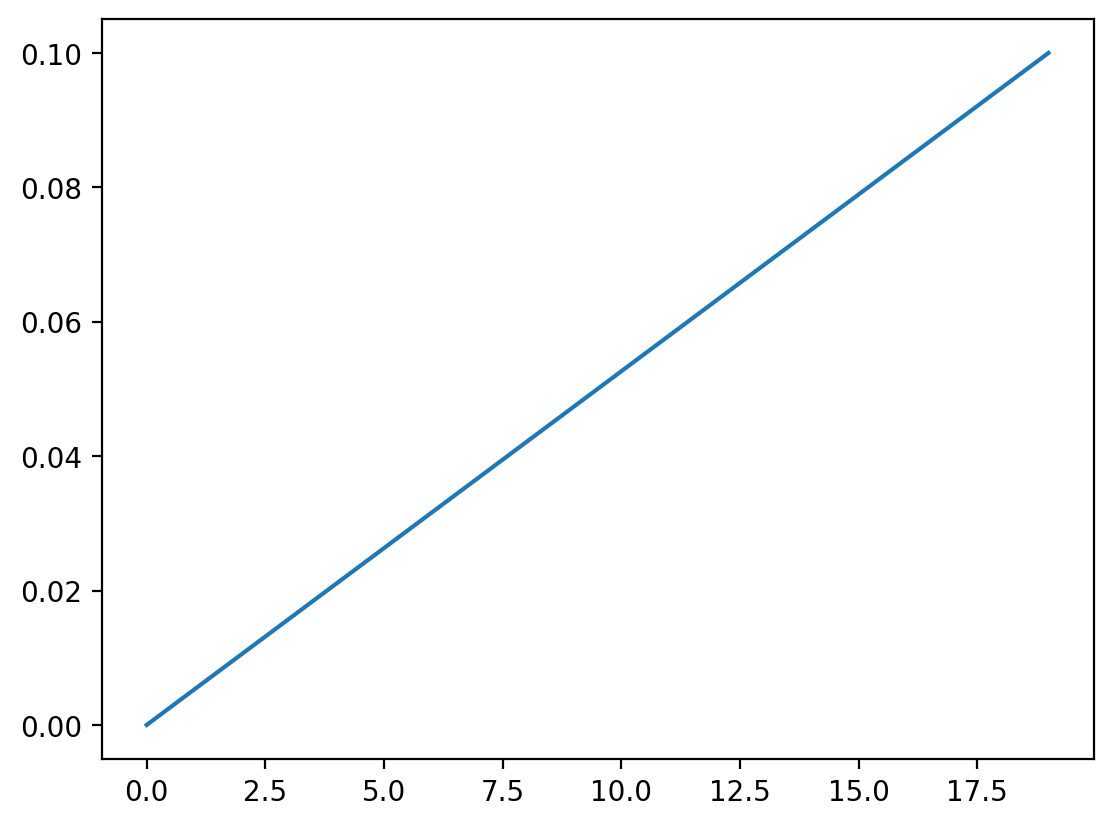

In [ ]:
# demonstrate iterative learning

In [ ]:
data = [0, 1, 1, 0, 1, 1, 1, 0, 1,]


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

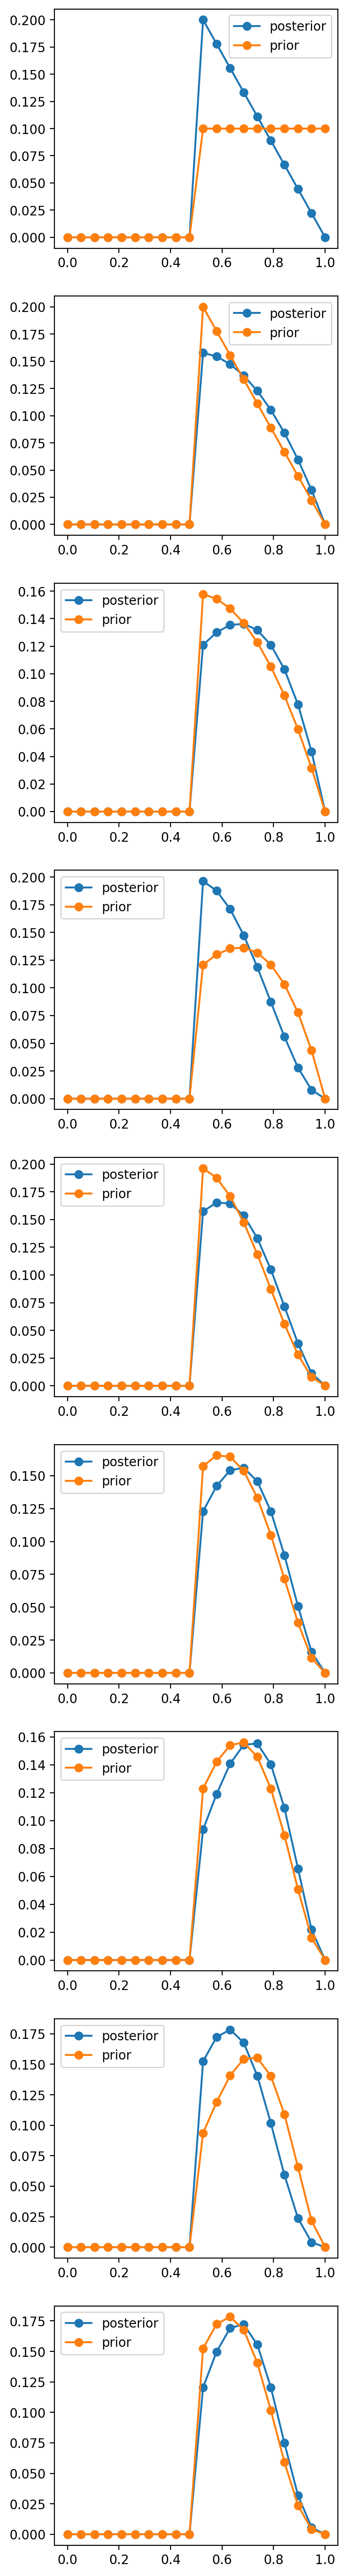

In [ ]:
%matplotlib inline

fig, ax = plt.subplots(
    nrows=len(data),
    )

if len(data)==1:
  ax = [ax]
fig.set_figheight(4*(len(data)))
fig.set_figwidth(4)


# define the grid and our initial priors:
p_grid = np.linspace(0, 1, 20)

# Define the prior distribution as a uniform distribution
prior = np.array(
    [1 for p in p_grid]
    )


# Define the prior distribution as a uniform distribution
prior = []
for p in p_grid:
  if p>0.5:
    prior.append(1)
  else:
    prior.append(0)
prior = np.array(prior)
prior = prior / np.sum(prior)


# go over the data and plot priors and posteriors:

for idx, res in enumerate(data):
  plt.sca(ax[idx])

  post = bayesian_bernoulli_learning(
      p_grid,
      prior,
      1,
      res
      )

  plt.plot(p_grid, post, '-o', label='posterior')
  plt.plot(p_grid, prior, '-o', label='prior')

  prior = post

  plt.legend()



### Bayesian learning: MCMC

In [ ]:
6/9

0.6666666666666666